Dataset Loaded Successfully!
     id     category     label  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Cleaning done!

Sentiment Analysis Completed!


C:\Users\Nilam\AppData\Local\Temp\ipykernel_10196\2414339416.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


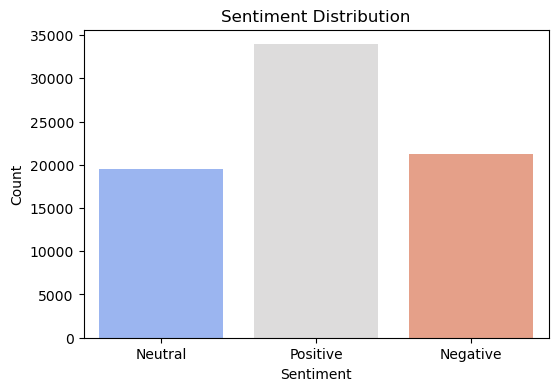

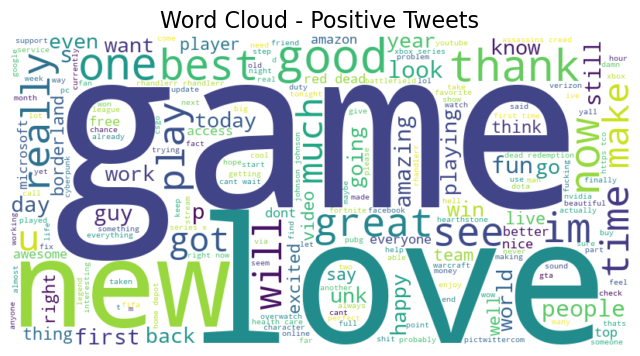

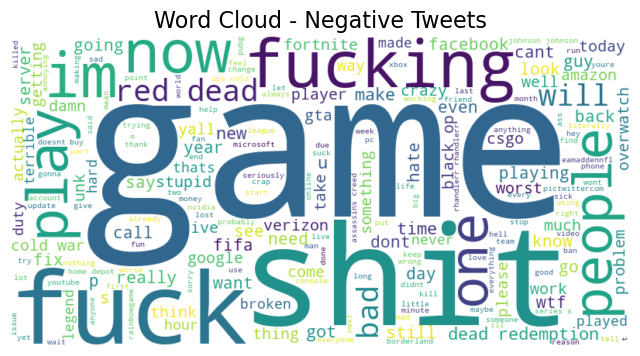

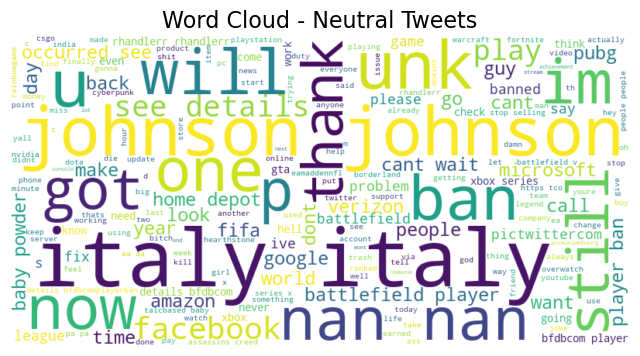

C:\Users\Nilam\AppData\Local\Temp\ipykernel_10196\2414339416.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='polarity', data=avg_polarity, palette='viridis')


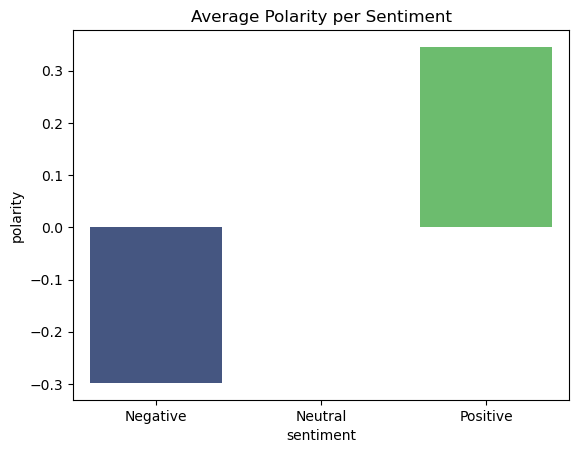

Results saved as 'sentiment_results.csv'


In [1]:
#Task-03: Sentiment Analysis on Social Media Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import re


#Load dataset correctly
url = r"C:\Users\Nilam\Downloads\twitter_training.csv"
df = pd.read_csv(url, encoding='latin1', header=None)
df.columns = ['id', 'category', 'label', 'tweet']

print("Dataset Loaded Successfully!")
print(df.head())

#Clean the tweet text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_text'] = df['tweet'].apply(clean_text)
print("Cleaning done!")


#Sentiment Analysis
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment_label(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['polarity'] = df['clean_text'].apply(get_polarity)
df['sentiment'] = df['polarity'].apply(get_sentiment_label)

print("\nSentiment Analysis Completed!")
df[['tweet', 'sentiment']].head()


#Visualize Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


#Word Clouds for Each Sentiment
sentiments = ['Positive', 'Negative', 'Neutral']

for s in sentiments:
    plt.figure(figsize=(8,5))
    wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df[df['sentiment']==s]['clean_text']))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {s} Tweets", fontsize=16)
    plt.show()


#Average Polarity by Sentiment
avg_polarity = df.groupby('sentiment')['polarity'].mean().reset_index()
sns.barplot(x='sentiment', y='polarity', data=avg_polarity, palette='viridis')
plt.title("Average Polarity per Sentiment")
plt.show()

#Save Results
df.to_csv("sentiment_results.csv", index=False)
print("Results saved as 'sentiment_results.csv'")
